# Support vector machines
The Support Vector Machines supervised algorithm is still used today for classification tasks. For a brief introduction to SVM you can read my notes in the [data science repository](https://github.com/luigiselmi/datascience/blob/9f9b906e2eee8a5e824b2708c74a20e2f75be03f/r/stat_learning/chapter9.ipynb). We use the Iris data set, that will be pre-processed as done before, and the Scikit-Learn implementation of [SVM](https://scikit-learn.org/stable/modules/svm.html).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)

numpy version: 1.23.1
pandas version: 1.4.3


## The Iris data set
We download the Iris data set from the Machine Learning Repository of the University of California Irvine [website](https://archive.ics.uci.edu/ml/index.php).

In [3]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_url, header=None, encoding='utf-8')
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data pre-processing
We need to prepare the data to be used for the training of the model. The pre-process consists of three steps: features selection, data partition, data normalization.

### Features selection
We copy the data from the Pandas dataframe to a NumPy array and then we select two features for the classification task: petal length and petal width

In [4]:
petal_length_col = 2
petal_width_col = 3
X = df.iloc[:, [petal_length_col, petal_width_col]].values # extract petal length and petal length
y = df.iloc[:, 4].values 
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)
y = y.astype(np.int64)
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Data partition
We split the data into a training set and a validation set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Data normalization
Finally we normalize the data. We apply a linear transformation the two subsets in order to be centered around their mean value and scaled by their standard deviation.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training the model
We use the Scikit-learn implementation of [SVM](https://scikit-learn.org/stable/modules/svm.html) with a linear kernel. The linear kernel works only with a data set that is linearly separable. if the data set is not linearly separable we have to use other nonlinear kernels. The 'C' hyperparameter allows us to choose the penalty for missclassifications. A large C value means we assign a high penalty to missclassifications while a small C value means we assign a low penalty. The first choice might lead to overfitting while the second more biased choice might lead to underfitting.   

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

## Data visualization
We define a function to plot the data and show the linear separation between the three types of iris

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

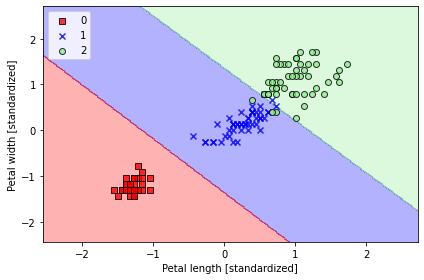

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=svm)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

## Nonlinear problems
We generate a synthetic random data set. The sysnthetic data represent two classes: class 1 and class 0. The class is assigned to each record according to the XOR logical rule depending on the random values of the coordinates.   

In [10]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # set y_xor=1 rows that have both coordinates > 0, y_or=0 otherwise 
y_xor = np.where(y_xor, 1, 0) # True -> 1, False -> 0

We use the random set as coordinates. We split the data in the two classes, class 0 and class 1. 

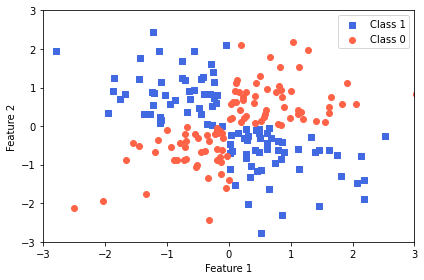

In [11]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='tomato', marker='o', label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

We use a nonlinear Radial Basis Function kernel to draw a nonlinear boundary between the two classes

$$K(x, x_i) = \exp(-\gamma \sum_{j=1}^p (x_j - x_{ij})^2)$$
 

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

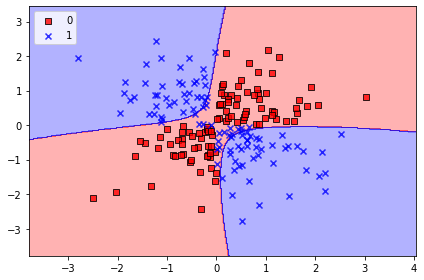

In [25]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()